<a href="https://colab.research.google.com/github/tharun-229/-AIML/blob/main/Assingnment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types of Each Feature:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics for Numeric Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     89

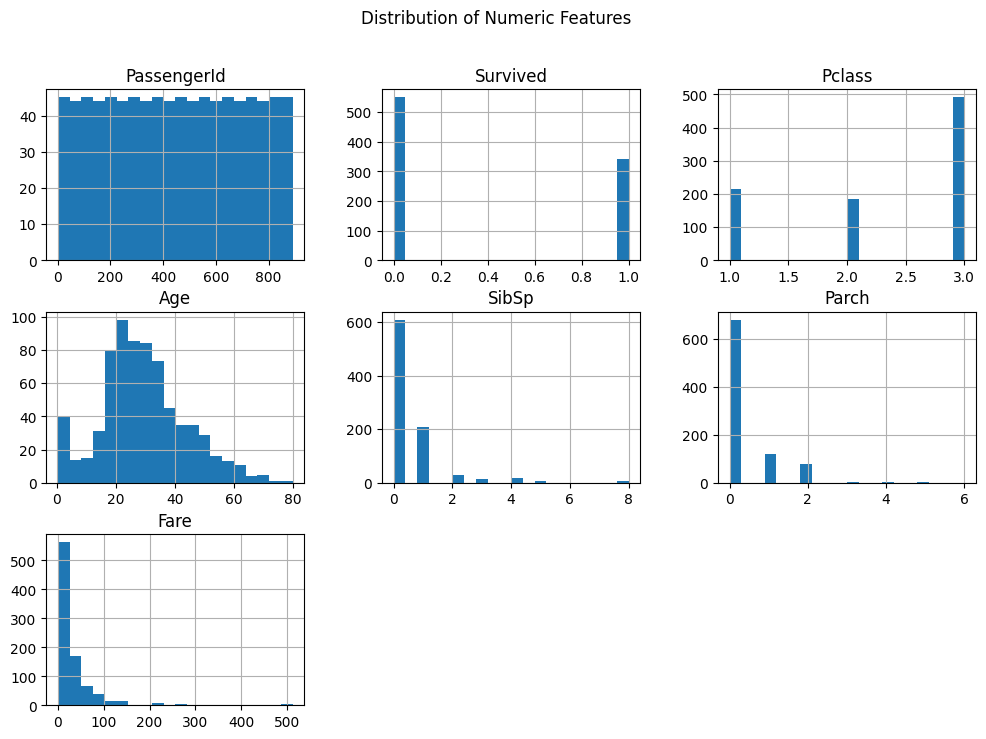

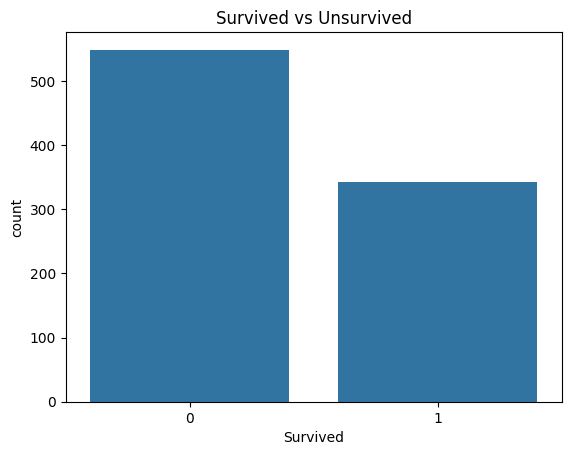

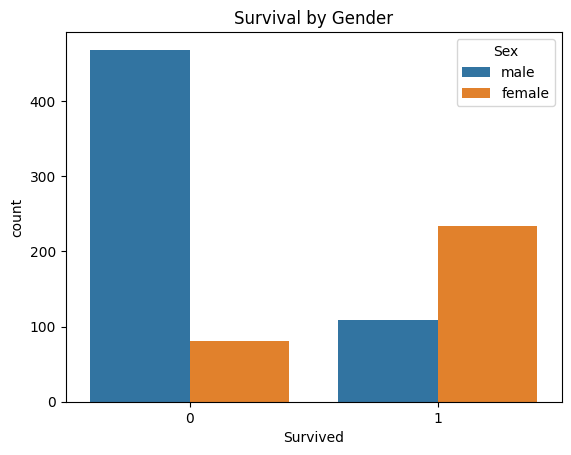

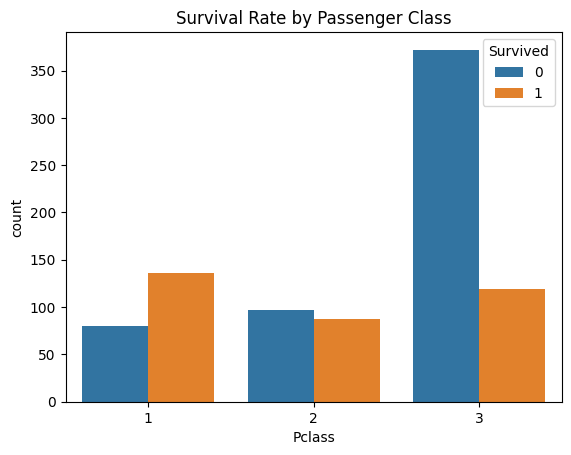

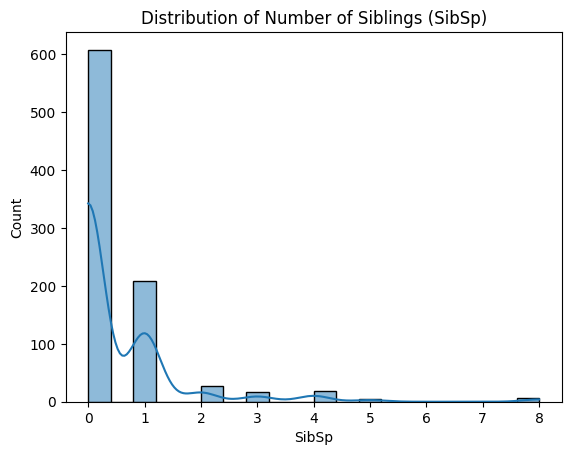

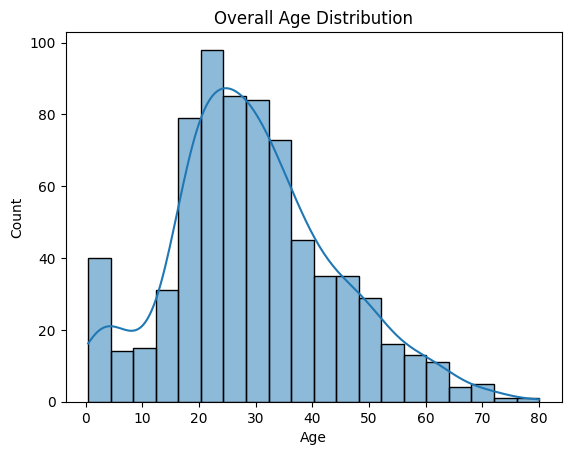

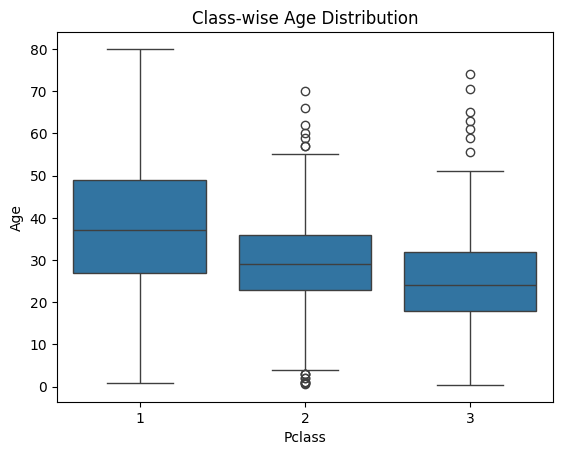


Data after wrangling:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500       2.0
1            2         1       1    1  38.0      1      0  71.2833       0.0
2            3         1       3    1  26.0      0      0   7.9250       2.0
3            4         1       1    1  35.0      1      0  53.1000       2.0
4            5         0       3    0  35.0      0      0   8.0500       2.0

Missing values after data wrangling:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Step 1: Fetch the Titanic dataset from an online CSV link (e.g., GitHub URL)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Fetching the CSV data from the URL
response = requests.get(url)
titanic_data = StringIO(response.text)

# Load the Titanic dataset into a DataFrame
df = pd.read_csv(titanic_data)

# Step 2: Check the data types of each feature (column)
print("Data Types of Each Feature:")
print(df.dtypes)

# Step 3: Generate a summary of the dataset for numerical features (min, max, stddev, quartiles)
summary_stats = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary Statistics for Numeric Features:")
print(summary_stats)

# Step 4: List the names of columns/features in the dataset
print("\nColumn Names in the Dataset:")
print(df.columns)

# Step 5: Perform Exploratory Data Analysis (EDA)

# 5.1 Plot Numeric Features (histograms)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()

# 5.2 Survived vs Unsurvived (Countplot)
sns.countplot(x='Survived', data=df)
plt.title('Survived vs Unsurvived')
plt.show()

# 5.3 Survival by Gender (Countplot)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

# 5.4 Survival Rate by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# 5.5 Distribution of Siblings (SibSp)
sns.histplot(df['SibSp'], kde=True, bins=20)
plt.title('Distribution of Number of Siblings (SibSp)')
plt.show()

# 5.6 Overall Age Distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=20)
plt.title('Overall Age Distribution')
plt.show()

# 5.7 Class-wise Age Distribution (Boxplot)
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Class-wise Age Distribution')
plt.show()

# Step 6: Perform Data Wrangling

# 6.1 Impute missing Age data with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# 6.2 Drop unnecessary columns (e.g., 'Name', 'Ticket', 'Cabin' for simplicity)
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# 6.3 Recode categorical features like 'Sex' and 'Embarked' into numeric codes
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 6.4 Check the first few rows after cleaning
print("\nData after wrangling:")
print(df.head())

# Step 7: Check for missing values after wrangling
print("\nMissing values after data wrangling:")
print(df.isnull().sum())

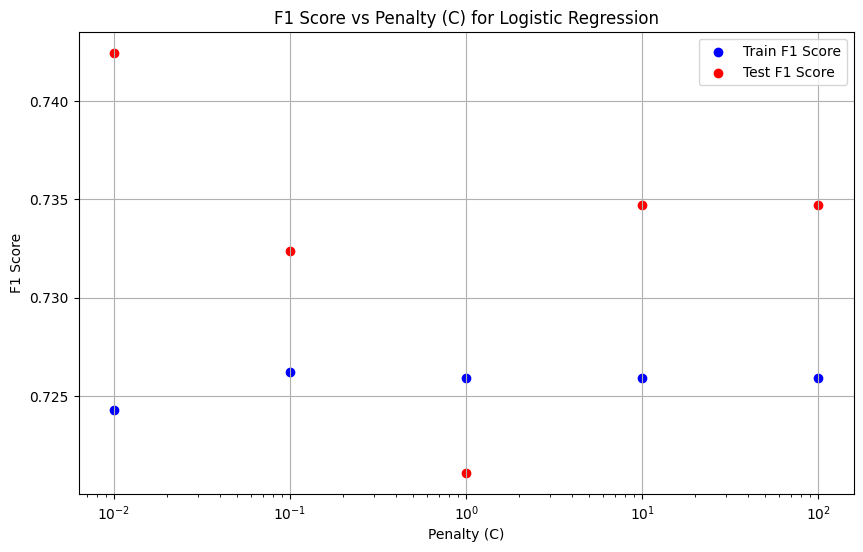

C values: [0.01, 0.1, 1, 10, 100]
Train F1 scores: [0.7242798353909465, 0.7262135922330097, 0.725897920604915, 0.725897920604915, 0.725897920604915]
Test F1 scores: [0.7424242424242424, 0.7323943661971831, 0.7210884353741497, 0.7346938775510204, 0.7346938775510204]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Fetch the Titanic dataset from the online source
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
response = requests.get(url)
titanic_data = StringIO(response.text)

# Load the dataset into a DataFrame
df = pd.read_csv(titanic_data)

# Step 1: Preprocess the Data

# Drop irrelevant columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Handle missing values - fill missing Age with median and drop rows with missing Embarked or Survived
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked', 'Survived'])

# Convert categorical columns to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features (X) and target (Y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']

# Step 2: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply Logistic Regression Model

# Create logistic regression model with different penalties (C values)
C_values = [0.01, 0.1, 1, 10, 100]
f1_scores_train = []
f1_scores_test = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_scaled, Y_train)

    # Predict on training and test data
    Y_train_pred = model.predict(X_train_scaled)
    Y_test_pred = model.predict(X_test_scaled)

    # Calculate the F1 score for both training and test data
    f1_train = f1_score(Y_train, Y_train_pred)
    f1_test = f1_score(Y_test, Y_test_pred)

    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Step 4: Plot F1 Scores as a Function of Penalty (C)

plt.figure(figsize=(10, 6))
plt.scatter(C_values, f1_scores_train, color='blue', label='Train F1 Score')
plt.scatter(C_values, f1_scores_test, color='red', label='Test F1 Score')
plt.xscale('log')  # Use a logarithmic scale for the penalty
plt.xlabel('Penalty (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty (C) for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, print the results for reference
print(f"C values: {C_values}")
print(f"Train F1 scores: {f1_scores_train}")
print(f"Test F1 scores: {f1_scores_test}")

